# Proyecto final de Python para Data Science
## Estudiante: Erick J. Pineda Amézquita
## Carnet:        17012140

Problema a resolver:

Crear un modelo lineal univariable para predecir el precio de casas en base a variables obtenidas, según los valores proporcionados en el archivo: "proyecto_training_data.npy"


#### Importar paquetes/librerías a utilizar:

In [179]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import lmplot
import sklearn as sl
from sklearn.linear_model import LinearRegression


Extracción de los datos a partir del archivo .npy

In [180]:
origenDeDatos = np.load('proyecto_training_data.npy')
type(origenDeDatos)

##np.savetxt("data.txt", OrigenDeDatos.tolist())
##OrigenDeDatos.tolist()


numpy.ndarray

### Separación de los datos en 80% y 20%

In [181]:
numDatosEntrenamiento=int(0.8*origenDeDatos.shape[0])
print("Cantidad de datos para ENTRENAMIENTO:   ", numDatosEntrenamiento)

numDatosValidacion=int(0.2*origenDeDatos.shape[0])
print("Cantidad de datos para VALIDACION:      ", numDatosValidacion)


Cantidad de datos para ENTRENAMIENTO:    1168
Cantidad de datos para VALIDACION:       292


#### Creación de Data Frames

In [182]:
dfEntrenamiento = pd.DataFrame(origenDeDatos[:numDatosEntrenamiento])
dfEntrenamiento.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

dfValidacion = pd.DataFrame(origenDeDatos[numDatosEntrenamiento:])
dfValidacion.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

print("Data Frame de Entrenamiento:   ",dfEntrenamiento.shape)
print("Data Frame de Validacion:      ",dfValidacion.shape)


Data Frame de Entrenamiento:    (1168, 6)
Data Frame de Validacion:       (292, 6)


#### Presentación de datos para ver como vienen

In [183]:
dfEntrenamiento.head(2)

,SalePrice,Overall,Floor,Rooms,Year,Front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0


#### Analitica de datos por medio de estadística

In [184]:
dfEntrenamiento.describe()

,SalePrice,Overall,Floor,Rooms,Year,Front
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### Media, minimo, maximo, rangos

In [185]:
dfEntrenamiento.mean(axis=0)


SalePrice    180590.277397
Overall           6.101027
Floor          1156.323630
Rooms             6.485445
Year           1971.451199
Front            69.946985
dtype: float64

In [186]:
dfEntrenamiento.min(axis=0)


SalePrice    34900.0
Overall          1.0
Floor          334.0
Rooms            2.0
Year          1875.0
Front           21.0
dtype: float64

In [187]:
dfEntrenamiento.max(axis=0)


SalePrice    755000.0
Overall          10.0
Floor          3228.0
Rooms            14.0
Year           2010.0
Front           313.0
dtype: float64

In [188]:
dfEntrenamiento.std(axis=0)


SalePrice    78815.697902
Overall          1.378025
Floor          373.780374
Rooms            1.609141
Year            29.951707
Front           23.478161
dtype: float64

#### Correlación entre todas las variables

In [189]:
dfEntrenamiento.corr()


,SalePrice,Overall,Floor,Rooms,Year,Front
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Overall,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Floor,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Rooms,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Year,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Front,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


#### Rangos


In [190]:
print ("Intervalo SalePrice:   [", dfEntrenamiento["SalePrice"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Overall:     [", dfEntrenamiento["Overall"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Floor:       [", dfEntrenamiento["Floor"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Rooms:       [", dfEntrenamiento["Rooms"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Year:        [", dfEntrenamiento["Year"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Front:       [", dfEntrenamiento["Front"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")



Intervalo SalePrice:   [ 34900.0   -    755000.0 ]
Intervalo Overall:     [ 1.0   -    755000.0 ]
Intervalo Floor:       [ 334.0   -    755000.0 ]
Intervalo Rooms:       [ 2.0   -    755000.0 ]
Intervalo Year:        [ 1875.0   -    755000.0 ]
Intervalo Front:       [ 21.0   -    755000.0 ]


##  Graficas de cada Variable. Histogramas

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


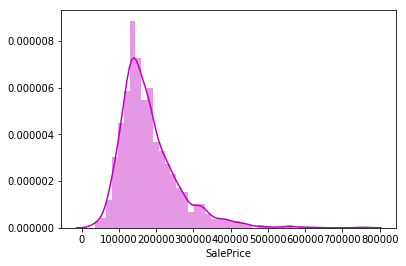

In [191]:
#sns.distplot(dfEntrenamiento["SalePrice"], hist=False, color="g", kde_kws={"shade": True})
sns.distplot(dfEntrenamiento["SalePrice"], color="m")


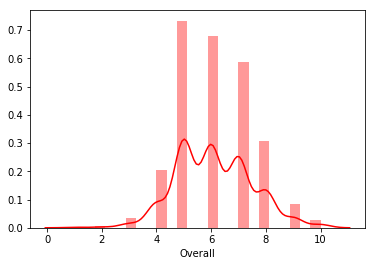

In [192]:
sns.distplot(dfEntrenamiento["Overall"], color="r")


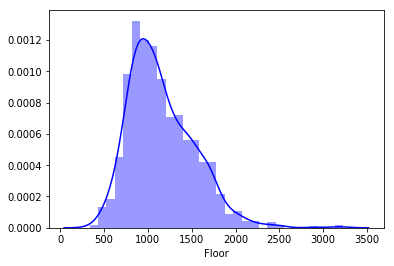

In [193]:
sns.distplot(dfEntrenamiento["Floor"], color="b")


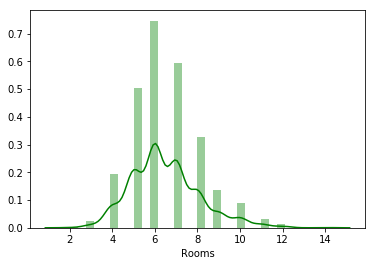

In [194]:
sns.distplot(dfEntrenamiento["Rooms"], color="g")


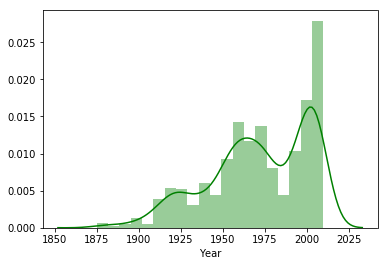

In [195]:
sns.distplot(dfEntrenamiento["Year"], color="g",bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


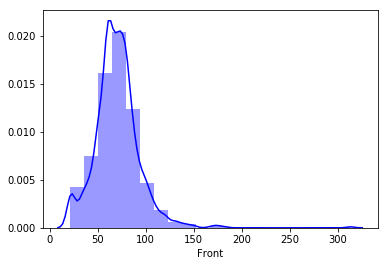

In [196]:
sns.distplot(dfEntrenamiento["Front"], color="b",bins=20)



# Graficas X,Y para observar el comportamiento del precio y sus variables

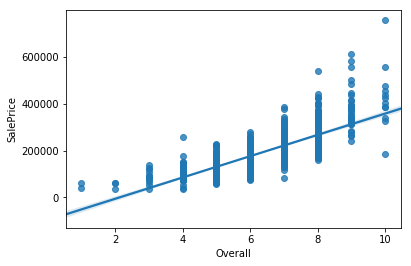

In [197]:
ax = sns.regplot(x="Overall", y="SalePrice", data=dfEntrenamiento)

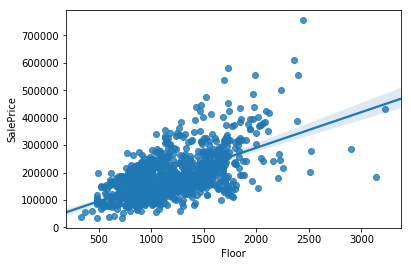

In [198]:
ax = sns.regplot(x="Floor", y="SalePrice", data=dfEntrenamiento)

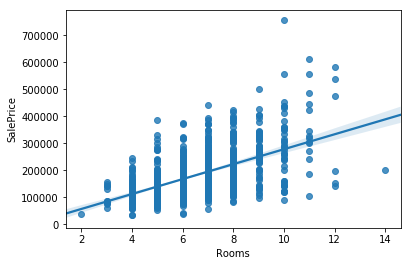

In [199]:
ax = sns.regplot(x="Rooms", y="SalePrice", data=dfEntrenamiento)

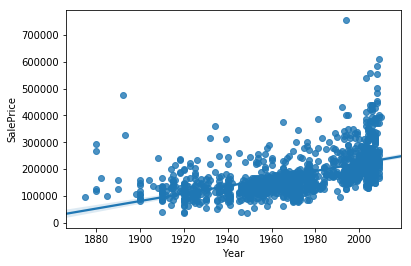

In [200]:
ax = sns.regplot(x="Year", y="SalePrice", data=dfEntrenamiento)

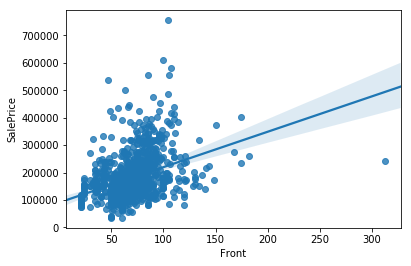

In [201]:
ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)

### Funcion de entrenamiento manual

## Se tomarán las 2 variables: Overall y Floor, segun la tendencia de las mismas

In [231]:
def regresionLineal(argX, argY, EPOCHS, imprimir_error_cada, lr):
    mb=np.array([0.1,0.2])
    #mb=np.array([[0.1,0.2]])
    count=0
    
    #mb=np.array([27000.0, 96199.0])
    unos = np.ones_like(argX)
    arrXUnos=np.column_stack((argX,unos))
    vectorDeErrores=[]
    vectorModeloMB=[]
    
    ##vectorModeloMB = np.ones(shape = (0, 2), dtype = float)
    #arrError=np.ndarray([])
    
    while count < EPOCHS:
        #yhat=np.dot(arrXUnos,mb)
        yhat=np.matmul(arrXUnos,mb)
        ##arrError= 0.5*(np.mean(argY-yhat)**2)
        arrError= 0.5*(np.mean(np.power(argY-yhat,2)))
        
        ##gradiente = np.mean(np.dot(np.transpose(yhat - argY),arrXUnos))
        #gradiente = np.mean(np.dot((yhat - argY),arrXUnos))
        
        ndToArr=np.array([np.dot((yhat - argY),arrXUnos)])
        gradiente = ndToArr.mean(axis=0)
        
        mb-= lr * gradiente  
        #mb[0] = mb[0]-lr * gradiente
        #mb[1] = mb[1]-lr * gradiente
        
        ## Codigo que estaba dando el error, al aplicaro de esta manejra, la variable es por referencia.
        ##vectorDeErrores.append(arrError)
        
        ### Se utilizó list ya que de lo contrario los valores van cambiando porque la variable se va por referencia.
        vectorModeloMB.append(list(mb))
        vectorModeloMB.append(mb)
        print(vectorModeloMB)
        #vectorModeloMB=np.append(vectorDeErrores,np.ndarray(mb))
        #vectorModeloMB=np.append(vectorModeloMB, [[mb[0], mb[1]]], axis = 0)
        
        
        if ((count % imprimir_error_cada == 0)):
            print("*Iteracion:", count, " Argumentos: ", 
                  mb , " *Error:", arrError, " *Gradiente: ",gradiente)
        count+=1
        

    
    return "end" #vectorModeloMB,vectorDeErrores
    
regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)



[[138751.78885999965, 21093.049780000016], array([138751.78886,  21093.04978])]
*Iteracion: 0  Argumentos:  [138751.78886  21093.04978]  *Error: 19409567140.73658  *Gradiente:  [-1.38751689e+09 -2.10928498e+08]
[[138751.78885999965, 21093.049780000016], array([-371511.50377234,  -59152.19877594]), [-371511.5037723378, -59152.19877593976], array([-371511.50377234,  -59152.19877594])]
[[138751.78885999965, 21093.049780000016], array([1506903.00441196,  233588.82002926]), [-371511.5037723378, -59152.19877593976], array([1506903.00441196,  233588.82002926]), [1506903.0044119619, 233588.82002925785], array([1506903.00441196,  233588.82002926])]
[[138751.78885999965, 21093.049780000016], array([-5406141.30820002,  -846420.49069413]), [-371511.5037723378, -59152.19877593976], array([-5406141.30820002,  -846420.49069413]), [1506903.0044119619, 233588.82002925785], array([-5406141.30820002,  -846420.49069413]), [-5406141.308200019, -846420.4906941259], array([-5406141.30820002,  -846420.4906941

'end'

### Función para Overall

In [203]:
resultadoOverall=regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)
print(resultadoOverall)

*Iteracion: 0  Argumentos:  [120937.2883  43172.9444]  *Error: 12104167210.2782  *Gradiente:  [-1.20937288e+09 -1.81729444e+08]
*Iteracion: 10  Argumentos:  [4.33328828e+10 6.76628521e+09]  *Error: 2.713653892243017e+21  *Gradiente:  [-5.51065853e+14 -8.60468682e+13]
*Iteracion: 20  Argumentos:  [1.97628662e+16 3.08589775e+15]  *Error: 5.644425683965225e+32  *Gradiente:  [-2.51325248e+20 -3.92434988e+19]
*Iteracion: 30  Argumentos:  [9.0132735e+21 1.4073890e+21]  *Error: 1.1740456854381315e+44  *Gradiente:  [-1.14622199e+26 -1.78978284e+25]
*Iteracion: 40  Argumentos:  [4.11069418e+27 6.41869544e+26]  *Error: 2.4420257235579886e+55  *Gradiente:  [-5.22758805e+31 -8.16268351e+30]
([array([-5.09383092e+32, -7.95382674e+31]), array([-5.09383092e+32, -7.95382674e+31]), array([-5.09383092e+32, -7.95382674e+31]), array([-5.09383092e+32, -7.95382674e+31]), array([-5.09383092e+32, -7.95382674e+31]), array([-5.09383092e+32, -7.95382674e+31]), array([-5.09383092e+32, -7.95382674e+31]), array([-5

### Función para floor

In [204]:
resultadoFloor=regresionLineal(dfEntrenamiento["Floor"], dfEntrenamiento["SalePrice"], 50, 10, 0.0000001)
print(resultadoFloor)

*Iteracion: 0  Argumentos:  [23132.5773131 25018.1729444]  *Error: 12104167210.2782  *Gradiente:  [-2.31325773e+11 -1.81729444e+08]
*Iteracion: 10  Argumentos:  [5.05510411e+26 3.95844097e+23]  *Error: 5.810096173805203e+54  *Gradiente:  [-5.08458408e+33 -3.98152550e+30]
*Iteracion: 20  Argumentos:  [1.11112141e+49 8.70072781e+45]  *Error: 2.807024099094649e+99  *Gradiente:  [-1.11760116e+56 -8.75146804e+52]
*Iteracion: 30  Argumentos:  [2.44226578e+71 1.91243636e+68]  *Error: 1.3561538496423378e+144  *Gradiente:  [-2.45650840e+78 -1.92358916e+75]
*Iteracion: 40  Argumentos:  [5.36814619e+93 4.20357115e+90]  *Error: 6.551968201815242e+188  *Gradiente:  [-5.39945173e+100 -4.22808521e+097]
([array([-6.88101657e+113, -5.38823677e+110]), array([-6.88101657e+113, -5.38823677e+110]), array([-6.88101657e+113, -5.38823677e+110]), array([-6.88101657e+113, -5.38823677e+110]), array([-6.88101657e+113, -5.38823677e+110]), array([-6.88101657e+113, -5.38823677e+110]), array([-6.88101657e+113, -5.388

##  Visualización de errores

In [205]:
#ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)
#type(resultadoFloor[0])

def graficar_error(errores, variableCasa,inicio, fin):
    arrRectaNumerica = np.arange(np.size(errores))
    
    plt.plot(arrRectaNumerica[:fin:inicio], errores[:fin:inicio])
    plt.title('Comportamiento del error para ' + str(variableCasa))
    plt.ylabel('Y - Error')
    plt.xlabel('X - Numero de Iteracion')    
    plt.show()

##ax = sns.regplot(x="Front", y="SalePrice", data=dfValidacion)
    

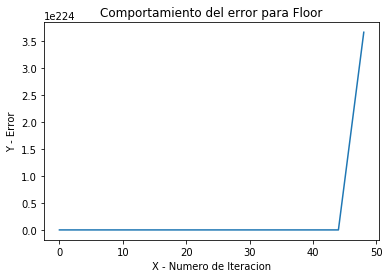

In [206]:
#ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)
#type(resultadoFloor[0])

graficar_error(resultadoFloor[1],"Floor", 4,1000)

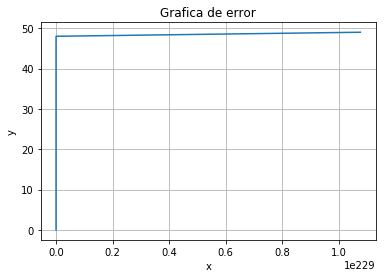

In [207]:
import matplotlib.pyplot as plt

x = resultadoFloor[1]
y = np.arange(np.size(x) )

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.grid()
ax.plot(x,y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Grafica de error')

plt.show()


## Modelo con Sk

In [208]:
def entrenamientoSKT(x, y):
    modeloSkt = LinearRegression()    
    modeloSkt.fit(x,y)
    return np.append(modeloSkt.coef_.flatten(), modeloSkt.intercept_.flatten())



### Entrenando modelo

## Entrenamiento para Overall 

In [209]:
serY = dfEntrenamiento["SalePrice"]
serX = dfEntrenamiento["Overall"]

xx=np.array(dfEntrenamiento["Overall"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


[ 45411.99877916 -96469.57131874]


### Entrenamiento para Floor

In [210]:
xx=np.array(dfEntrenamiento["Floor"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


[  129.95124229 30324.58517496]


# Conclusiones finales: 

En base a los modelos entrenados manualmente y con la herramienta Sklearn, se pueden concluir los siguientes modelos para las variables: Overall y Floor, que según las graficas, y el analisis exploratorio, tienden a tener mayor relación con el precio de las casas:

Para Overall:
Y = 45411.99*X-96469.57

Para Floor:
Y = 129.95*X+30324.58





In [211]:

######## Codigo comentado que ha optimizado

# lmplot(x, y, data=dsDatosEntrenamiento, fit_reg=False)
#dsDatosEntrenamiento.columns = ["Sequence", "Start", "End", "Coverage"]
##arrPrecio=dsDatosEntrenamiento[:,0]
##arrOver=dsDatosEntrenamiento[:,1]
##arrFloor=dsDatosEntrenamiento[:,2]
##arrRooms=dsDatosEntrenamiento[:,3]
##arrYear=dsDatosEntrenamiento[:,4]
##arrFront=dsDatosEntrenamiento[:,5]


##mediaPrecio=np.mean(dsPrecio)
##minPrecio=np.min(dsPrecio)
##maxPrecio=np.max(dsPrecio)
##stdPrecio=np.std(dsPrecio)

##dsOverallQual=dsDatosEntrenamiento[:,1]
##mediaOverallQual=np.mean(dsOverallQual)
##minOverallQual=np.min(dsOverallQual)
##maxOverallQual=np.max(dsOverallQual)
##stdOverallQual=np.std(dsOverallQual)
##print(mediaOverallQual)
##print(minOverallQual)
##print(maxOverallQual)
##print(stdOverallQual)


